# Stocks Market Analysis


# 1. Define the Scope and Objective

Before starting any analysis, it is important to clearly define what you want to achieve and the context of your study.

- **Identify the Market or Industry:**  
  Specify the market, sector, or industry you are focusing on for your analysis.  
  *Example:* Technology sector stocks, global smartphone market, renewable energy industry, etc.

- **Define Specific Objectives:**  
  Clearly state the goals of your analysis.  
  *Examples:*  
  - Predicting future stock prices for selected companies  
  - Forecasting market growth for a specific sector  
  - Understanding consumer behavior trends  
  - Identifying factors influencing sales or market share



# 2. Data Collection

Gathering relevant and high-quality data is crucial for meaningful analysis.

- **Data Sources:**  
  Collect data from various sources such as:
  - Financial reports (e.g., company earnings, balance sheets)
  - Market research reports
  - Government databases and statistics
  - APIs (e.g., Yahoo Finance, Alpha Vantage)
  - Web scraping from reputable websites

- **Common Data Points:**  
  Depending on your objectives, the following data points can be useful:
  - Market size and market share
  - Growth rates over time
  - Consumer demographics and preferences
  - Competitive analysis (e.g., major players, market positioning)
  - Stock prices (Open, High, Low, Close, Volume)
  - Economic indicators (interest rates, GDP, inflation, etc.)

*Carefully collected and well-documented data forms the foundation for robust analysis and reliable predictions.*


## Step 3: Data Preparation

Before building any machine learning model, it is crucial to prepare the data properly. This step includes cleaning the data to remove inconsistencies, handling missing values, and combining data from multiple sources if needed. We will use the Pandas library for efficient data manipulation and cleaning.

### 3.1 Load Data

We begin by loading the stock data from a CSV file using Pandas.

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [22]:
# Load the stock market data from CSV
df = pd.read_csv('stocks.csv')

# Display the first few rows to inspect the data
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [23]:
print("\nData types:\n", df.dtypes)


Data types:
 Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


### 3.2 Data Cleaning

Next, we clean the data by:
- Checking for missing values and handling them (e.g., dropping or imputing).
- Removing duplicate rows.
- Ensuring correct data types (e.g., converting the 'Date' column to datetime).

In [24]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Drop rows with missing values (or you could fill them if preferred)
df_cleaned = df.dropna()

# Remove duplicate rows if any
df_cleaned = df_cleaned.drop_duplicates()

# Display summary after cleaning
print("Missing values after cleaning:\n", df_cleaned.isnull().sum())
df_cleaned.head()

Missing values before cleaning:
 Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values after cleaning:
 Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


### 3.3 Combine Data from Multiple Sources (if applicable)

If you have additional data sources, you can combine them using Pandas' `merge` or `concat` functions. For this example, we assume all data is in `stocks.csv`, but here is how you would combine two datasets.

In [25]:
# Example: Combine with another CSV file (uncomment and edit if needed)
# df2 = pd.read_csv('other_stocks.csv')
# df2['Date'] = pd.to_datetime(df2['Date'])
# combined_df = pd.concat([df_cleaned, df2], ignore_index=True)
# combined_df = combined_df.drop_duplicates()
# combined_df.head()

# If only one source, just continue with df_cleaned
combined_df = df_cleaned.copy()

# Display the first few rows of the combined data
combined_df.head()

# Save the combined data to a new CSV file
combined_df.to_csv('combined_stocks.csv', index=False)


In [26]:
# Check the shape and info of the final dataset
print("Final dataset shape:", combined_df.shape)
print("\nData types:\n", combined_df.dtypes)
combined_df.head()

Final dataset shape: (248, 8)

Data types:
 Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


## Step 4: Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand the distribution of values, identify patterns, and detect any anomalies. We use Matplotlib and Seaborn for visualization.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for better visuals
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme()

### 4.1 Statistical Summary

Let's start with a statistical summary of the numerical features in the dataset.

In [28]:
# Display summary statistics for numerical columns
combined_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,248,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,2023-03-22 22:27:05.806451712,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
min,2023-02-07 00:00:00,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,2023-03-01 00:00:00,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,2023-03-22 12:00:00,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,2023-04-14 00:00:00,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,2023-05-05 00:00:00,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08
std,NaN,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07


### 4.2 Distribution of Each Attribute

We plot the distribution (histogram) of each numerical attribute to understand their spread and central tendency.

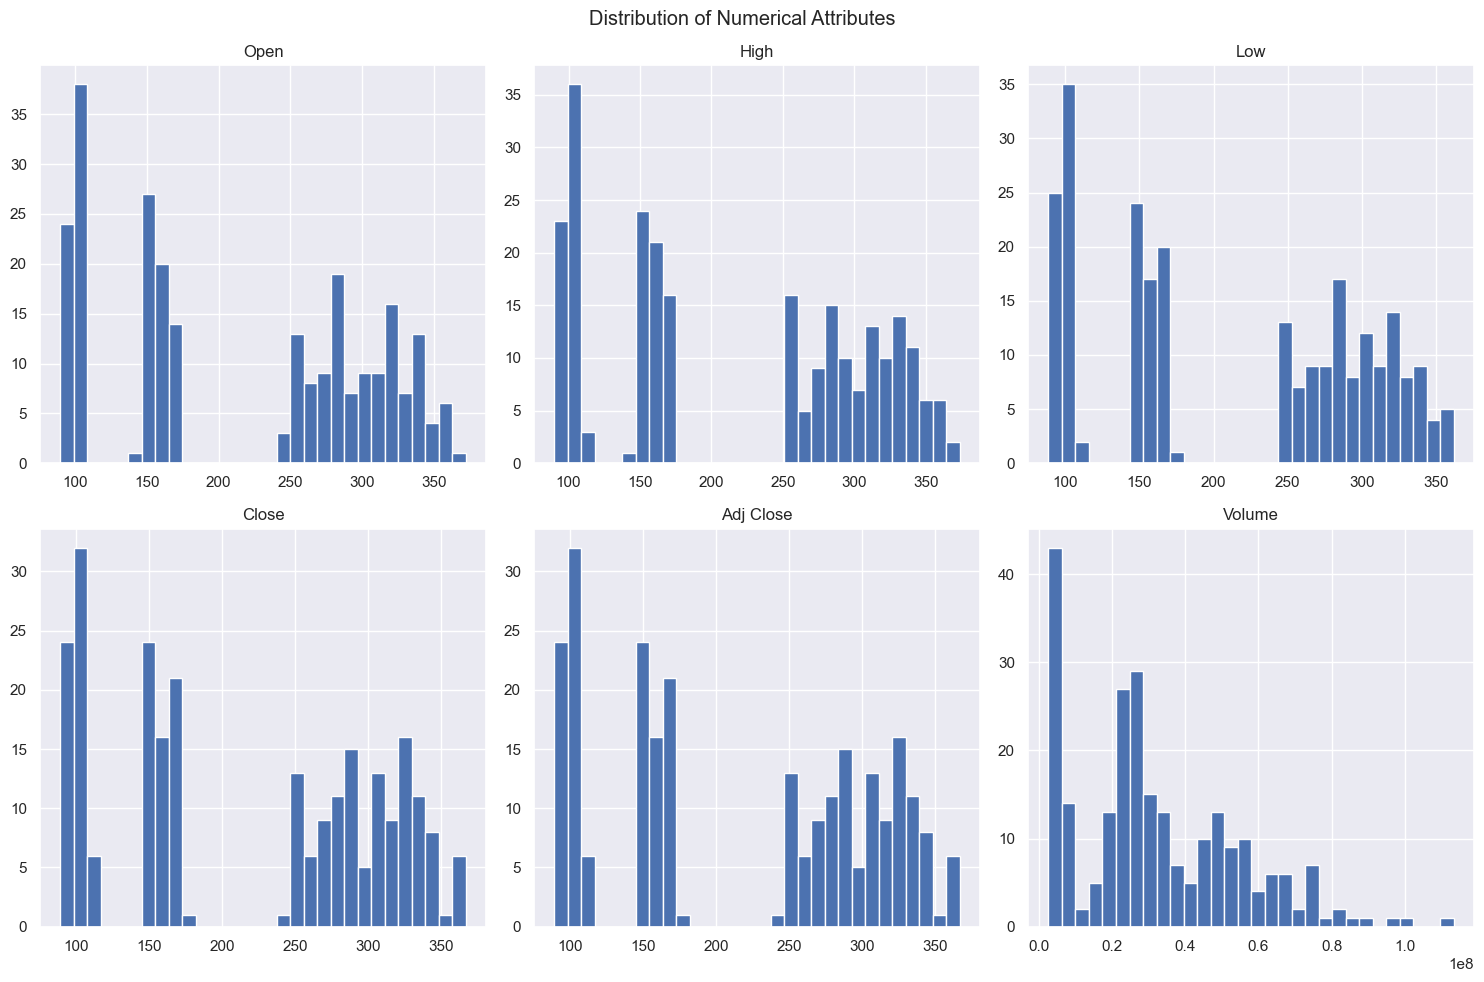

In [29]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribution of Numerical Attributes')
plt.tight_layout()
plt.show()

### 4.3 Time Series Plot of Closing Price

Visualize how the closing price changes over time for a selected stock ticker.

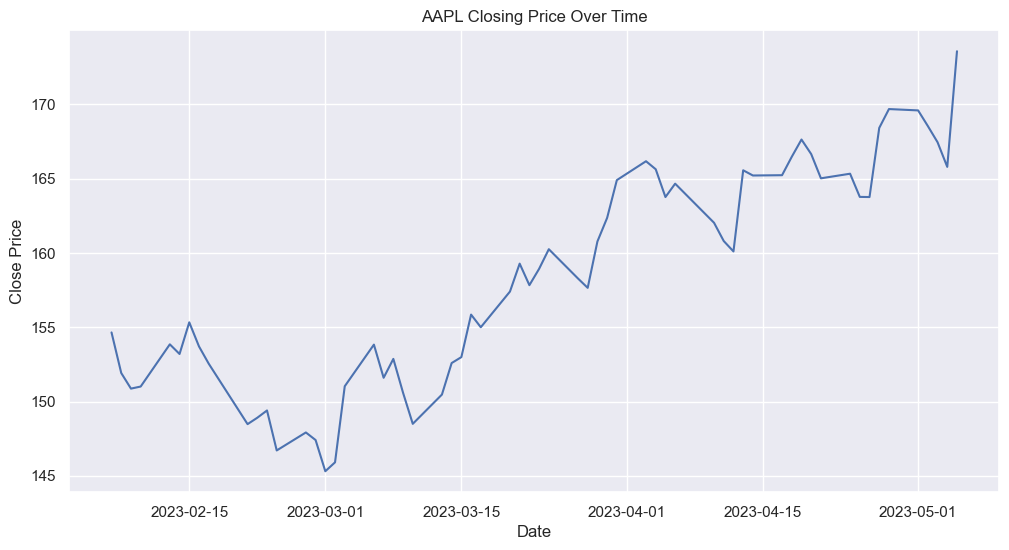

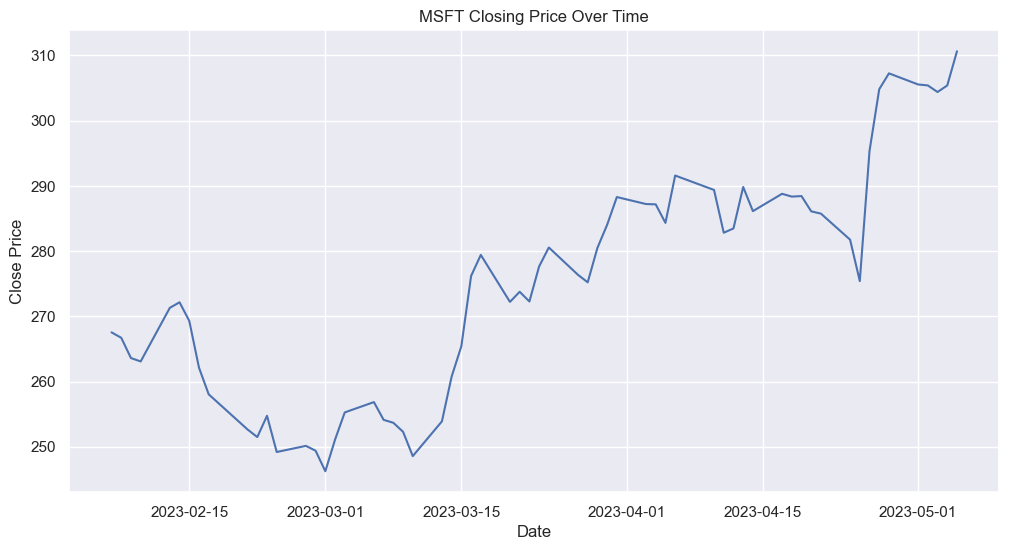

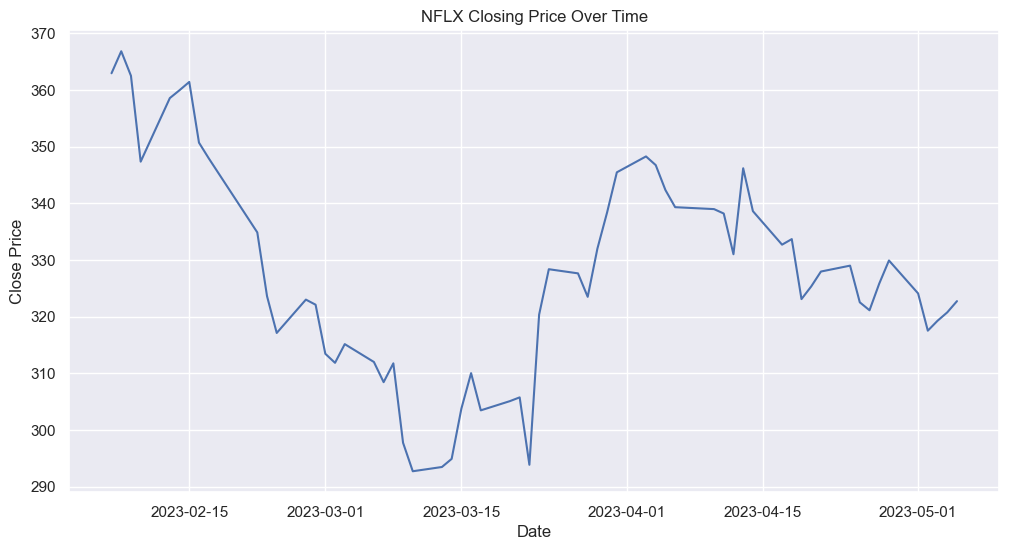

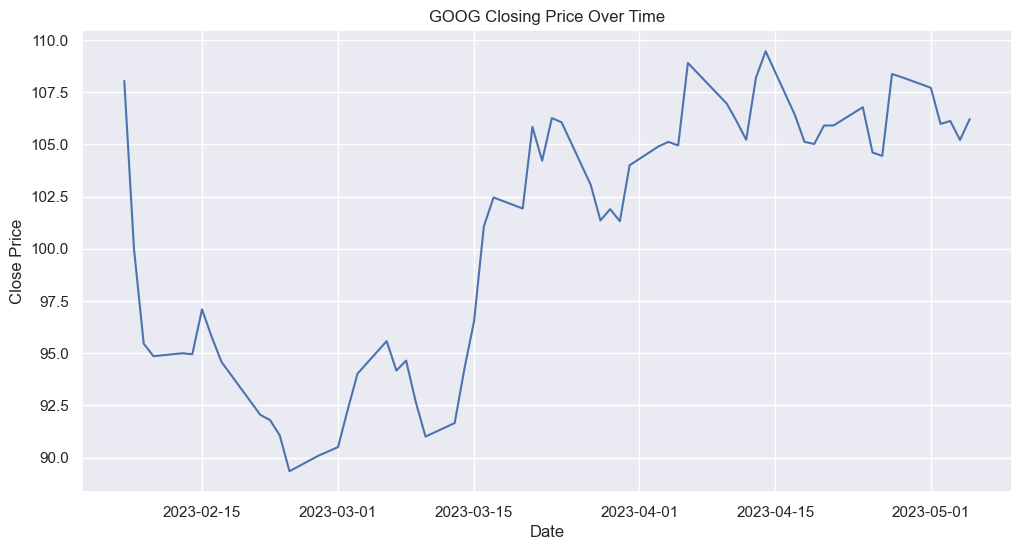

In [30]:
# Get all unique tickers
tickers = df['Ticker'].unique()

# Loop through each ticker and plot
for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_ticker['Date'], df_ticker['Close'])
    plt.title(f'{ticker} Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.show()


### Opening vs Closing Rate: Date-wise for Each Ticker

The following plots show the opening and closing prices for each ticker over time. This helps visualize daily price movements and trends for each stock.

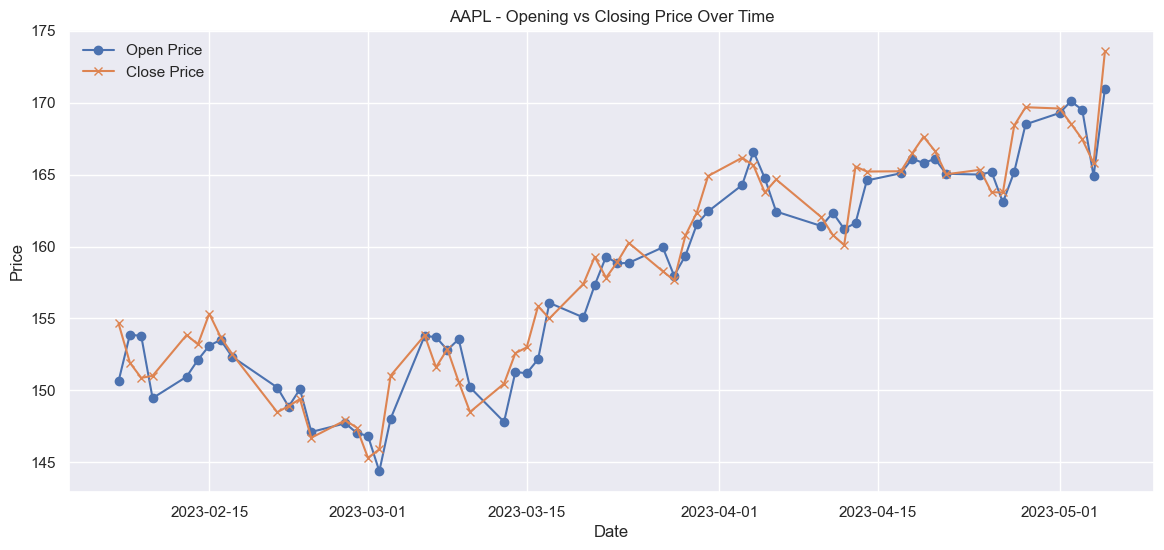

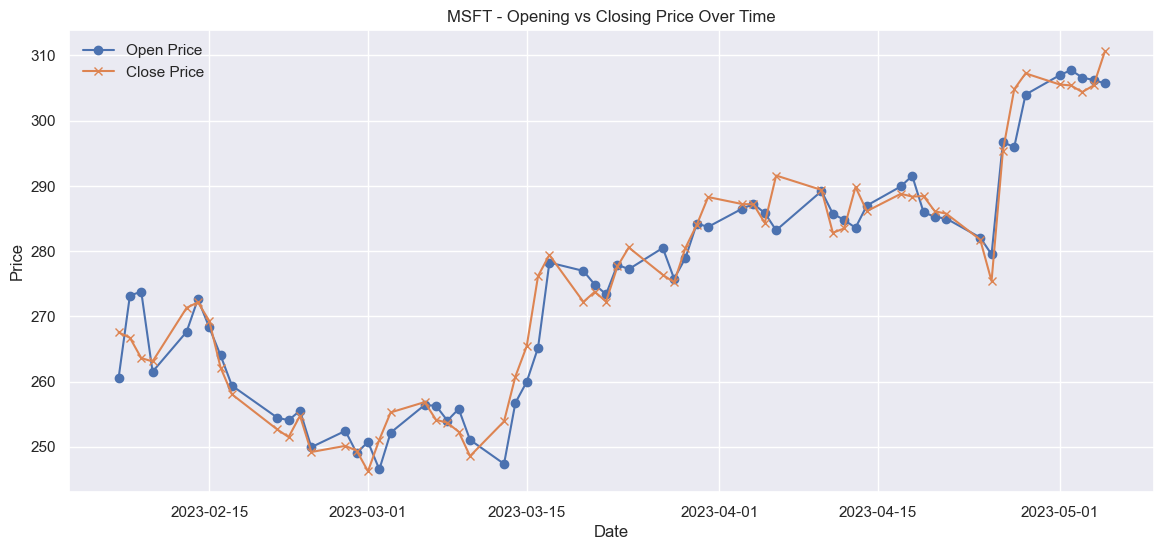

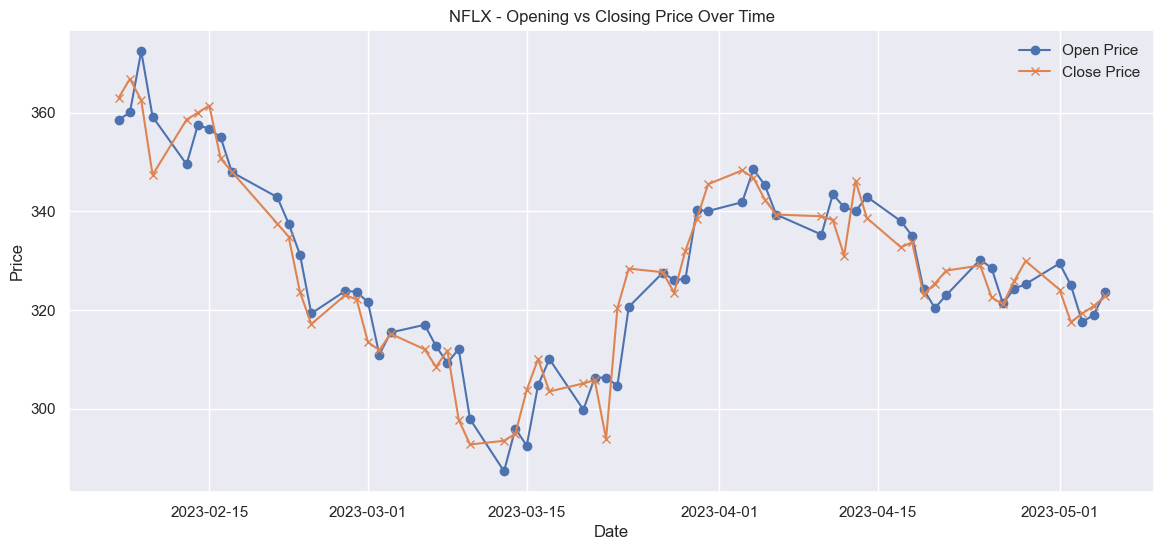

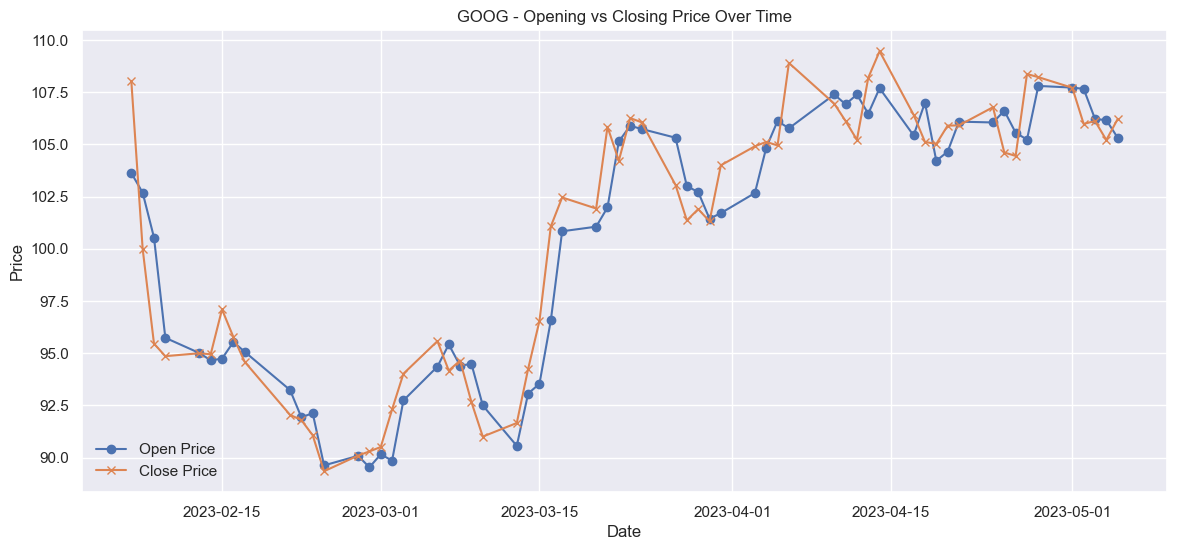

In [31]:
import matplotlib.pyplot as plt

# Get unique tickers
tickers = df['Ticker'].unique()

for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    plt.figure(figsize=(14, 6))
    plt.plot(df_ticker['Date'], df_ticker['Open'], label='Open Price', marker='o')
    plt.plot(df_ticker['Date'], df_ticker['Close'], label='Close Price', marker='x')
    plt.title(f"{ticker} - Opening vs Closing Price Over Time")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

### 4.4 Volume Traded Over Time

Plot the trading volume to observe periods of high or low activity.

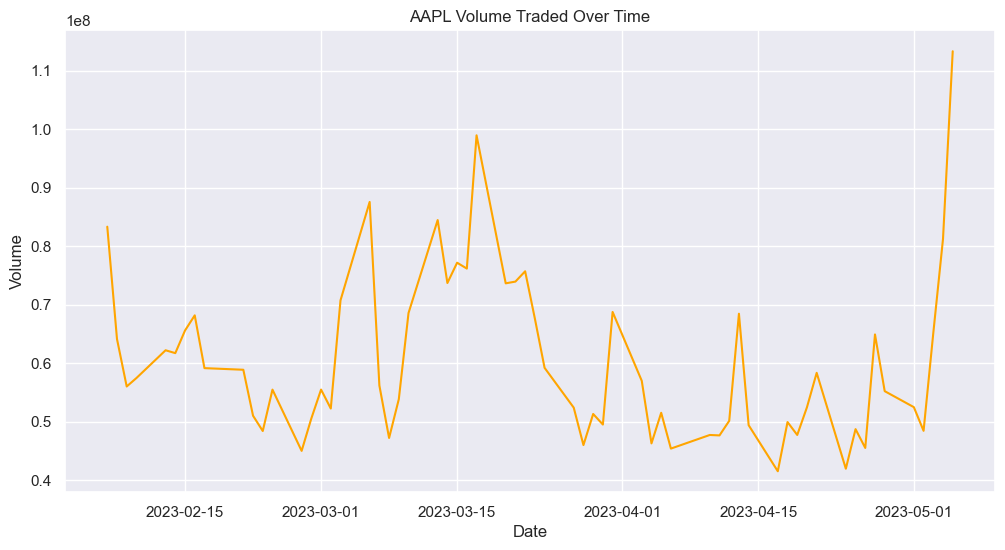

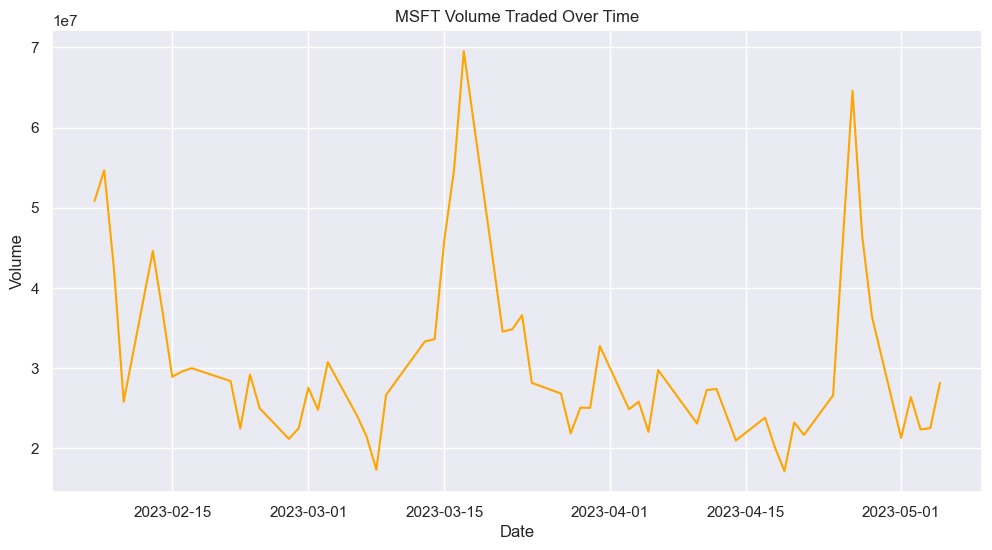

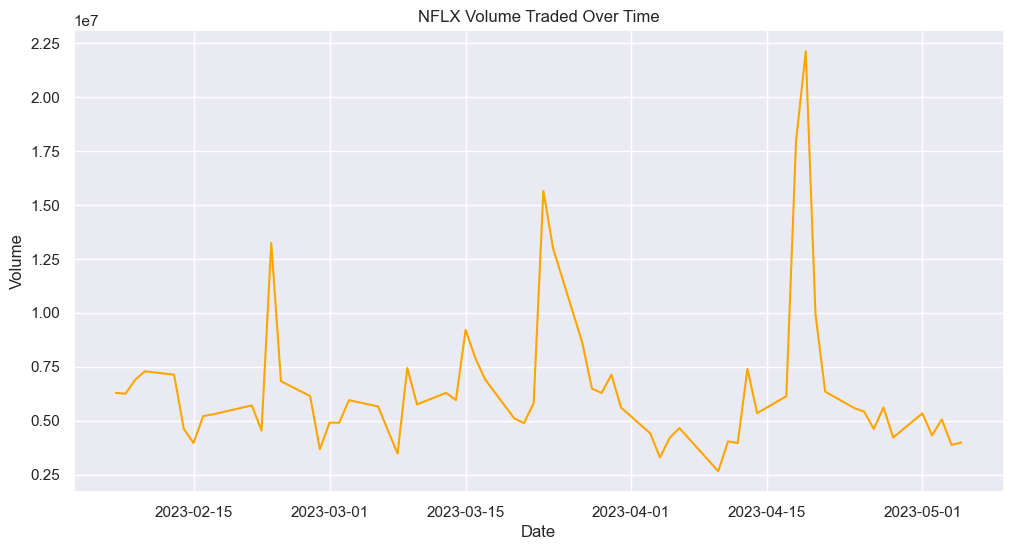

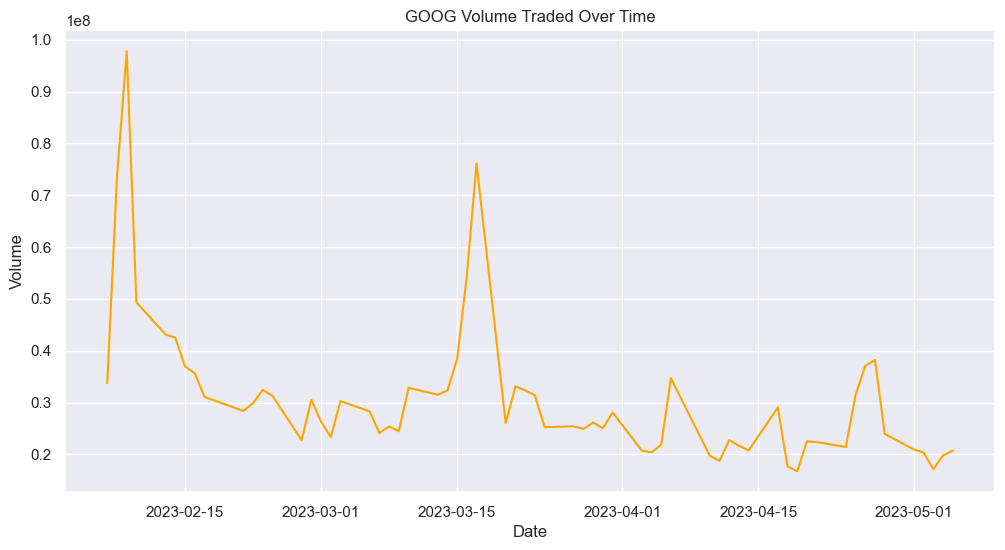

In [32]:
tickers = df['Ticker'].unique()

for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_ticker['Date'], df_ticker['Volume'], color='orange')
    plt.title(f'{ticker} Volume Traded Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.show()


### 4.5 Correlation Heatmap

Visualize the correlation between numerical features to identify relationships.

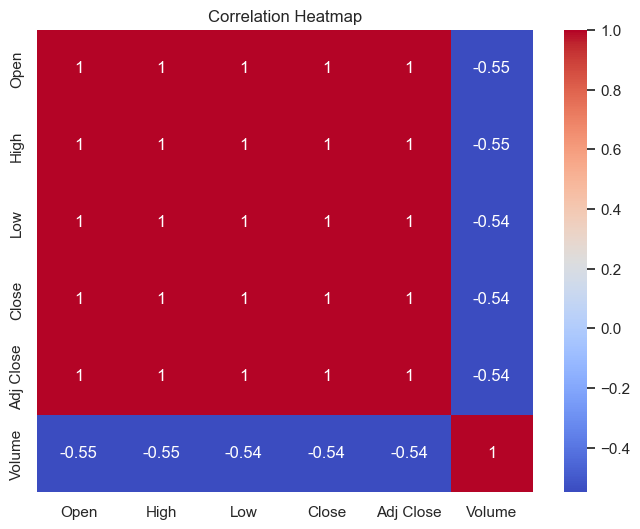

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 4.6 Pairplot of Attributes

Pairplots help visualize relationships and distributions among multiple variables.

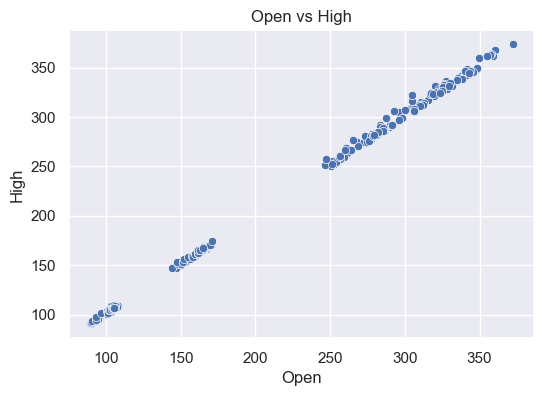

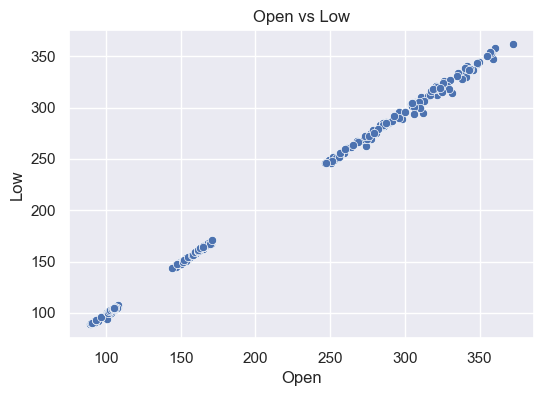

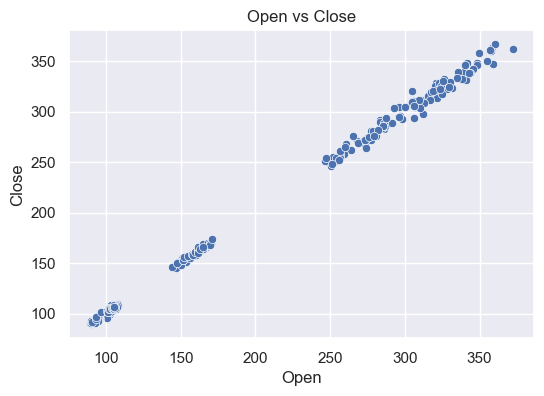

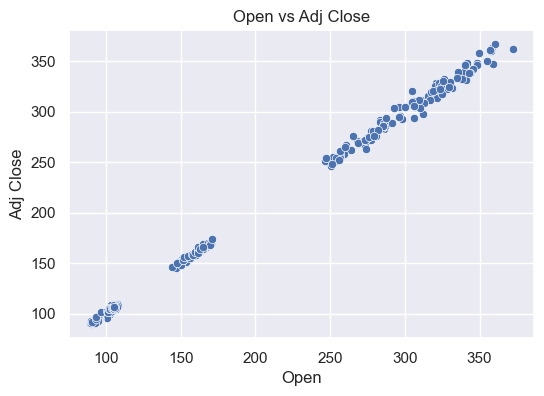

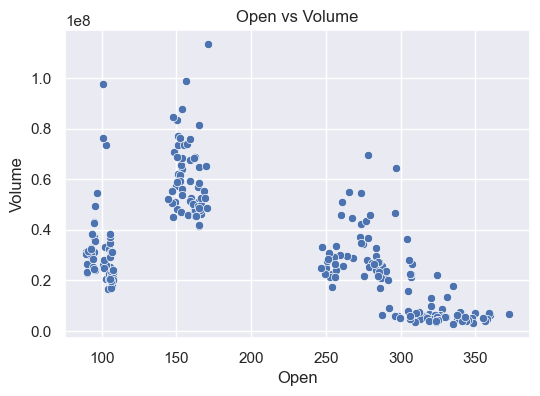

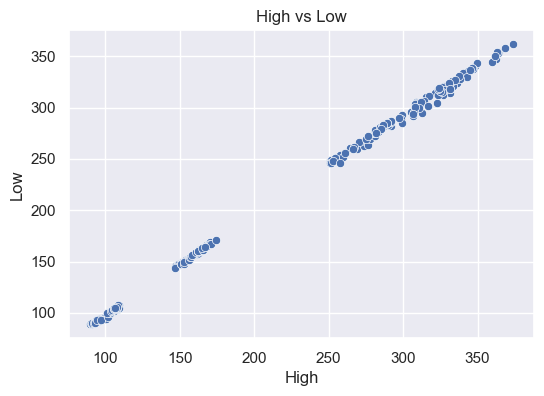

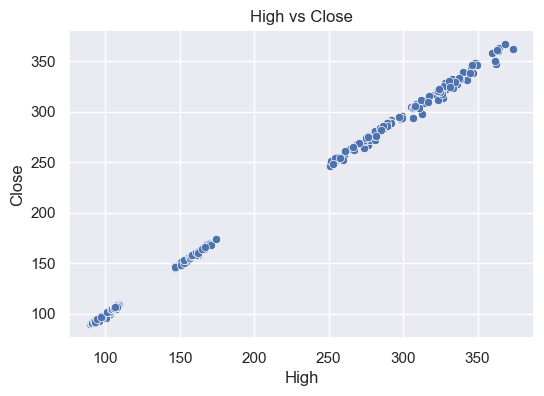

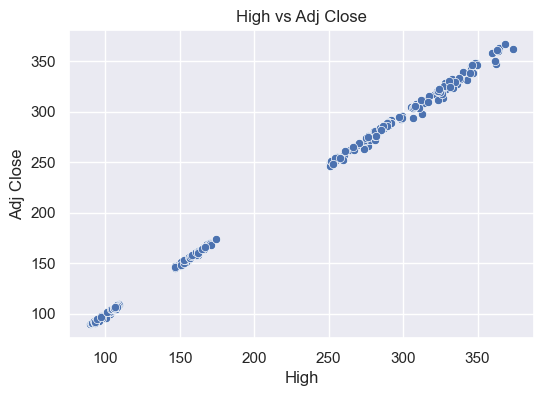

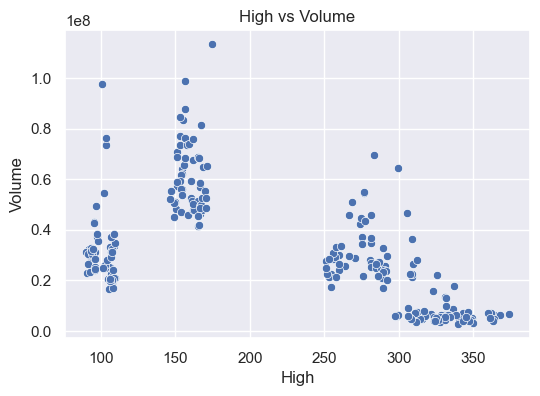

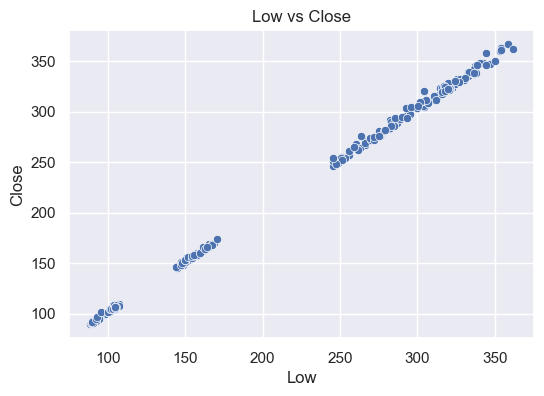

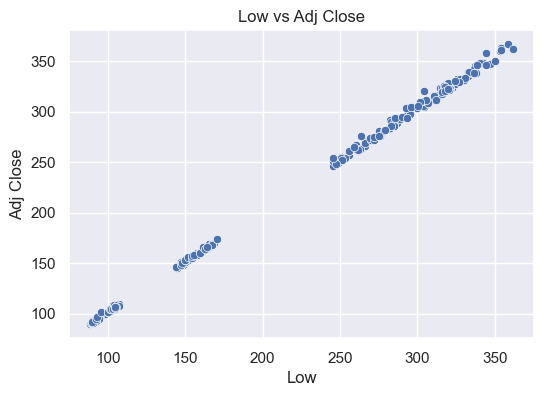

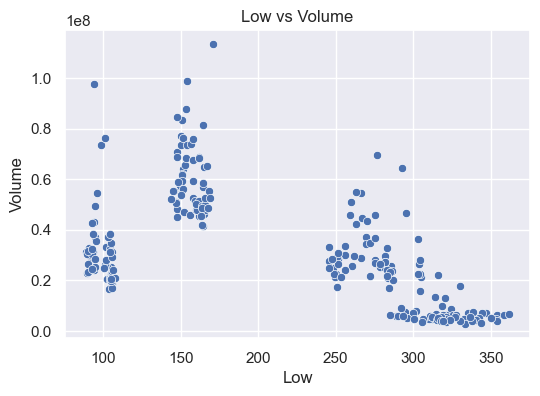

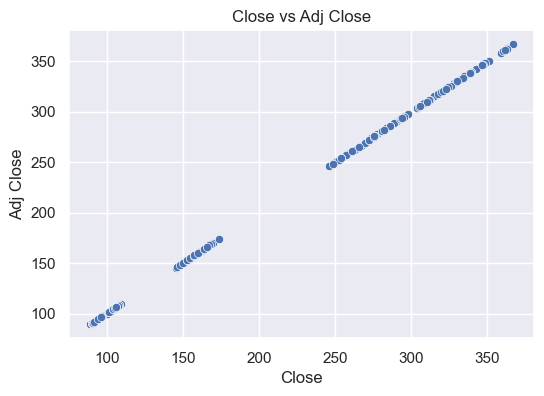

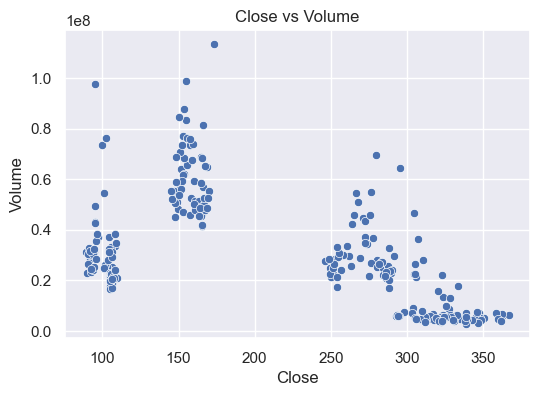

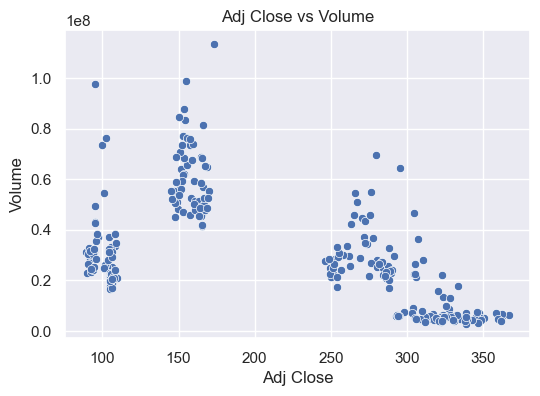

In [14]:
# List of your numeric columns
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Loop through all unique column pairs
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[cols[i]], y=df[cols[j]])
        plt.title(f'{cols[i]} vs {cols[j]}')
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.grid(True)
        plt.show()


### 4.7 Boxplots for Outlier Detection

Boxplots are useful for spotting outliers in each attribute.

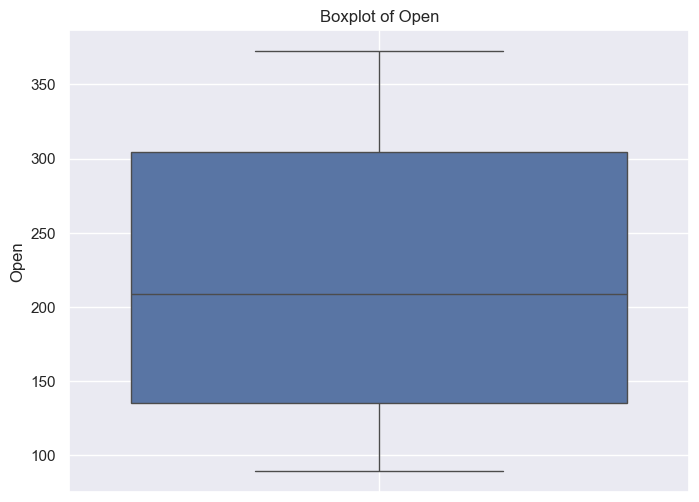

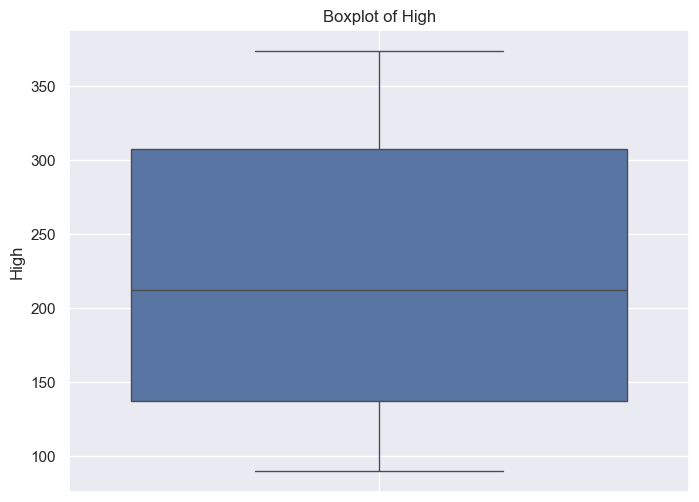

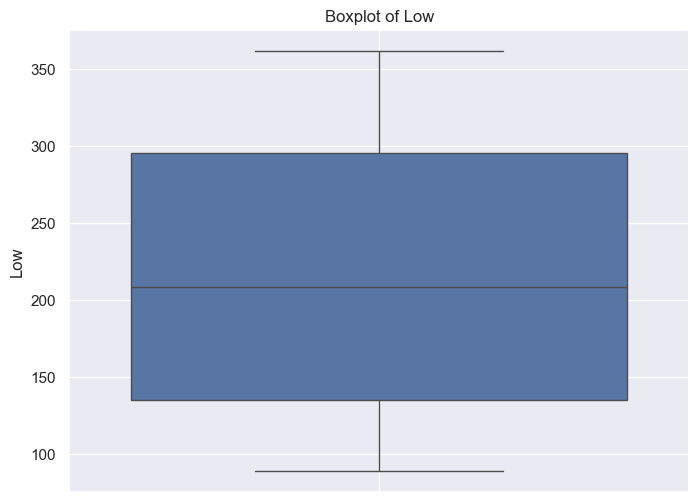

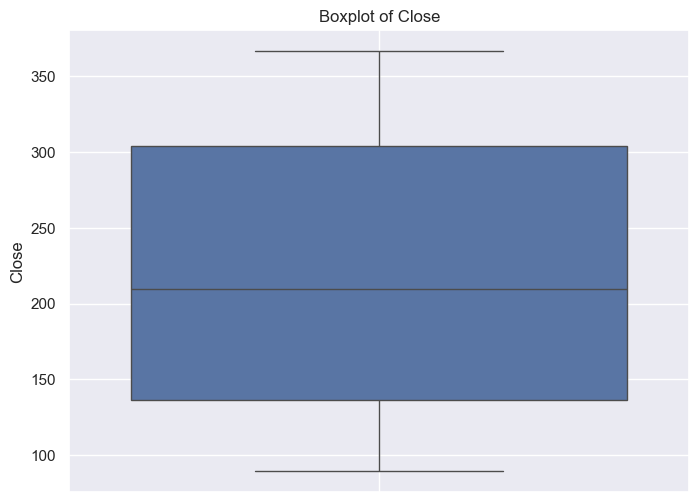

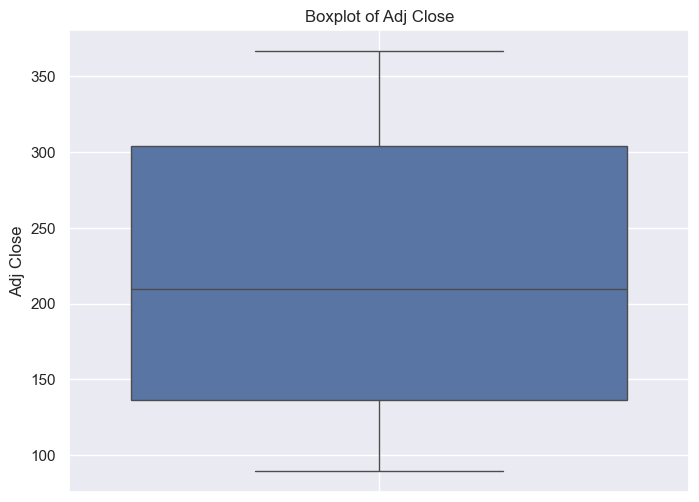

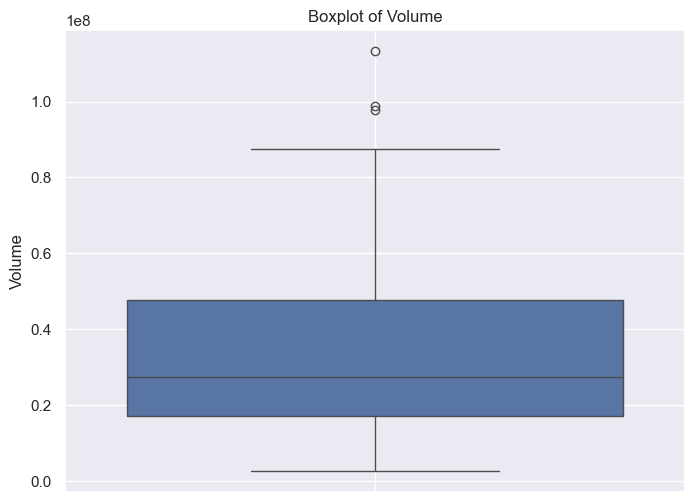

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


### 4.8 Candlestick Chart (Optional)

Candlestick charts are popular in financial analysis for visualizing high and low prices. Requires `mplfinance`.

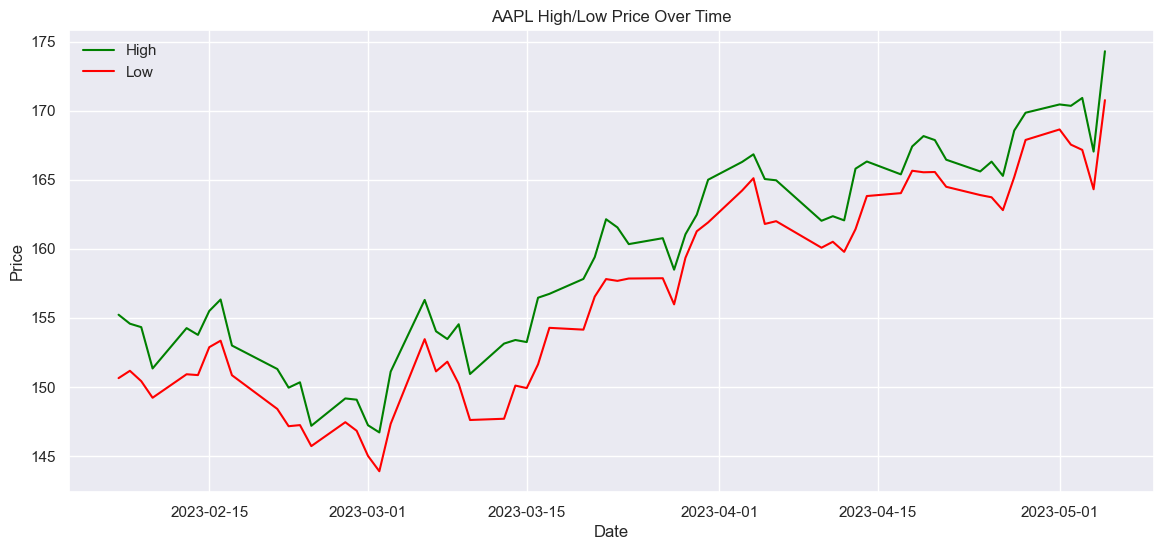

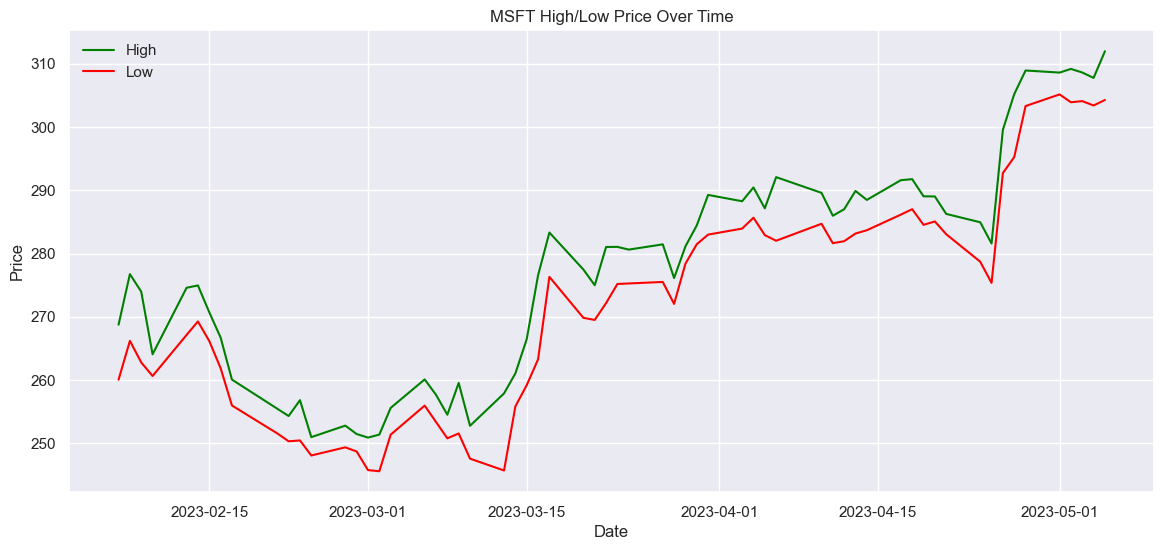

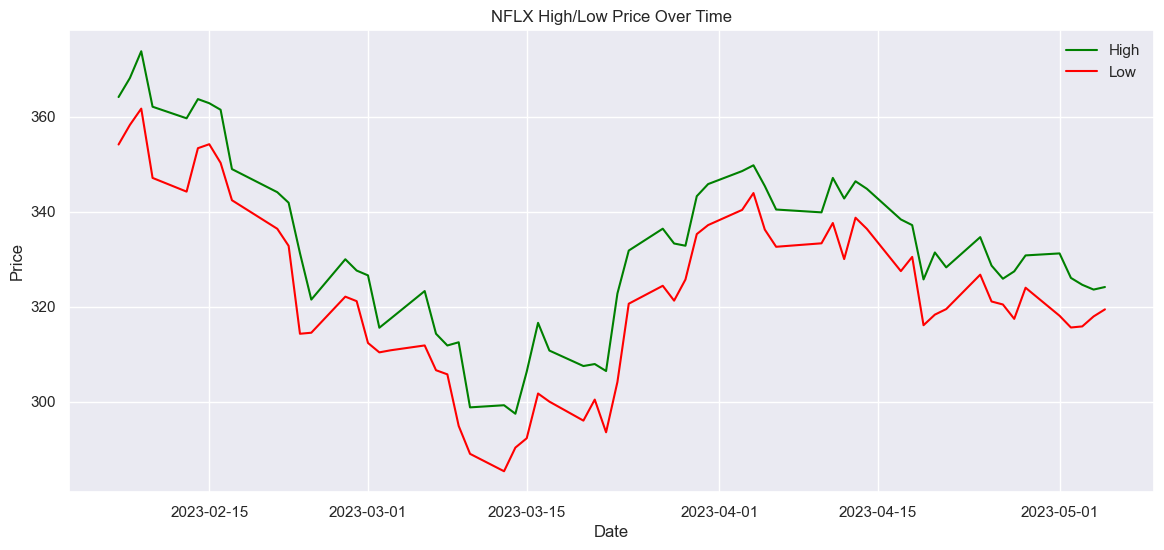

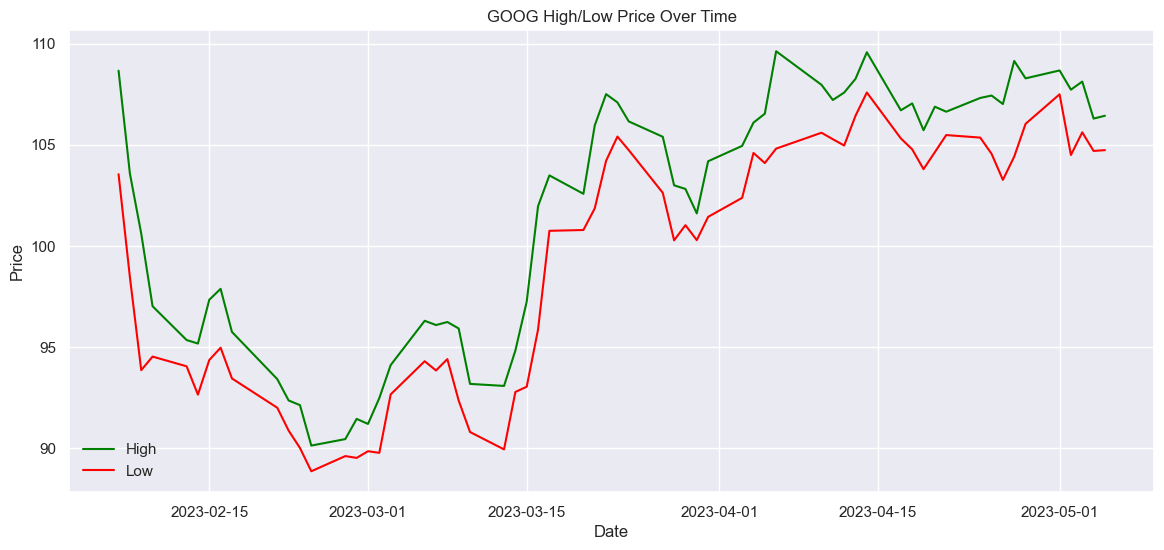

In [16]:
import matplotlib.dates as mdates

for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    plt.figure(figsize=(14, 6))
    plt.plot(df_ticker['Date'], df_ticker['High'], label='High', color='green')
    plt.plot(df_ticker['Date'], df_ticker['Low'], label='Low', color='red')
    plt.title(f'{ticker} High/Low Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


## Step 5: Feature Engineering

In this step, we create new features from the existing data that could help improve the performance of our machine learning model. We also normalize or standardize the features to ensure they are on a similar scale.

### 5.1 Creating New Features

We will add the following features:
- **Daily Return:** Percentage change in closing price from the previous day.
- **7-Day Moving Average:** Average closing price over the past 7 days.
- **14-Day Moving Average:** Average closing price over the past 14 days.
- **Price Range:** Difference between the day's high and low.
- **Volume Change:** Percentage change in volume from the previous day.

In [17]:
import pandas as pd

# Load the stock data
df = pd.read_csv('stocks.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [18]:
# Daily Return
df['Daily_Return'] = df['Close'].pct_change()

# 7-Day and 14-Day Moving Averages
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA14'] = df['Close'].rolling(window=14).mean()

# Price Range
df['Price_Range'] = df['High'] - df['Low']

# Volume Change
df['Volume_Change'] = df['Volume'].pct_change()

# Drop rows with NaN values created by rolling calculations
df = df.dropna().reset_index(drop=True)

df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,MA7,MA14,Price_Range,Volume_Change
0,AAPL,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,0.008248,149.668573,151.322142,1.720001,-0.188772
1,AAPL,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000,-0.003448,148.768572,150.805000,2.250000,0.123304
2,AAPL,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,-0.014246,147.734286,150.332857,2.220001,0.097573
3,AAPL,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52238100,0.004129,147.367144,149.978572,2.810013,-0.058417
4,AAPL,2023-03-03,148.039993,151.110001,147.330002,151.029999,151.029999,70732300,0.035090,147.670000,149.980001,3.779999,0.354037


### 5.2 Normalization / Standardization

To ensure all features contribute equally to the model, we standardize the numerical features using `StandardScaler` from scikit-learn.

In [19]:
from sklearn.preprocessing import StandardScaler

# Select features to scale
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
                     'Daily_Return', 'MA7', 'MA14', 'Price_Range', 'Volume_Change']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df_scaled.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,MA7,MA14,Price_Range,Volume_Change
0,AAPL,2023-02-27,-0.766639,-0.770525,-0.753799,-0.767548,-0.767438,0.667815,0.118022,-0.773747,-0.786114,-0.987376,-0.429969
1,AAPL,2023-02-28,-0.773758,-0.771484,-0.760600,-0.773062,-0.772952,0.923191,-0.076465,-0.783725,-0.792021,-0.843143,0.099016
2,AAPL,2023-03-01,-0.776130,-0.791186,-0.780564,-0.795767,-0.795659,1.150192,-0.256035,-0.795193,-0.797414,-0.851307,0.055400
3,AAPL,2023-03-02,-0.802554,-0.796724,-0.792739,-0.789280,-0.789172,1.001026,0.049536,-0.799263,-0.801461,-0.690741,-0.209010
4,AAPL,2023-03-03,-0.763080,-0.749864,-0.755115,-0.733923,-0.733809,1.852243,0.564402,-0.795905,-0.801445,-0.426770,0.490119


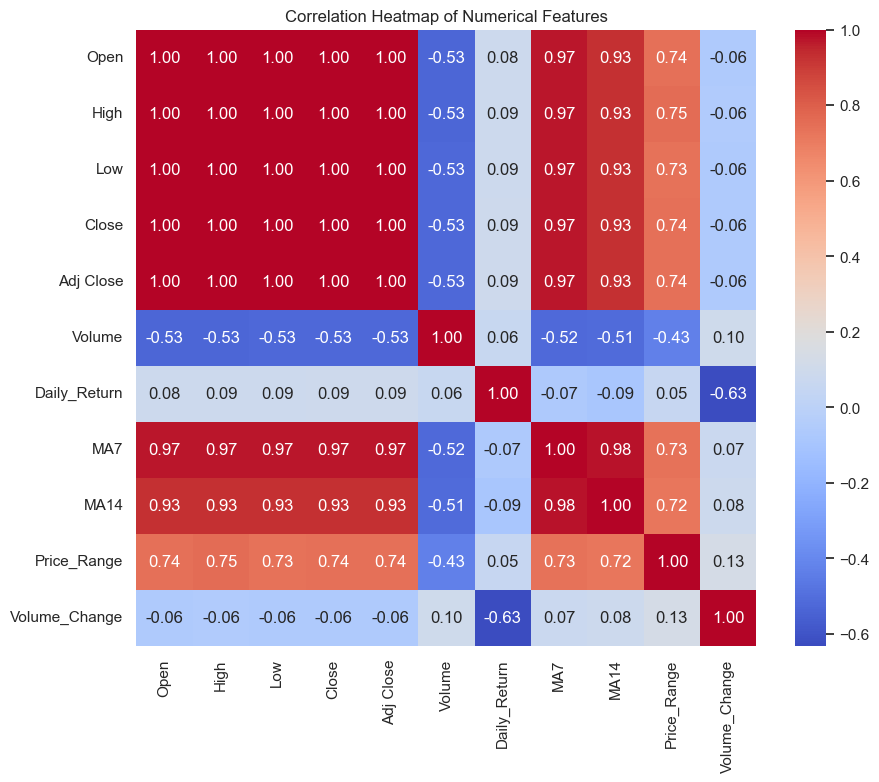

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for the heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()